#### Mini Project: Predicting Credit Card Fraud Using Decision Tree Classifier

#### Problem Statement:
The goal is to predict fraudulent transactions using a Decision Tree Classifier and analyze the factors that contribute to fraud detection. This model will help financial institutions detect fraud early, improving security and reducing financial risks.


#### Use Kaggle to download the dataset for Credit Card Fraud 
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

#### Step 1: import libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

 #### Step 2: Load the Dataset

In [84]:
data = pd.read_csv(r"C:\Users\NSTIW\Desktop\padmavathik_ NSTI\creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [108]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Step 3: Training and Testing

In [87]:
X = data[["Time", "Amount"]]  
y = data["Class"]  

In [89]:
X

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99
...,...,...
284802,172786.0,0.77
284803,172787.0,24.79
284804,172788.0,67.88
284805,172788.0,10.00


In [91]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
clf = DecisionTreeClassifier(max_depth=5)  # depth is used to prevent the overfitting
clf.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=5)

#### Step 4: Predictions

In [98]:
y_pred = clf.predict(X_test)  

#### Step 5: Evaluating Model Accuracy

In [101]:
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Model Accuracy:", accuracy)

Decision Tree Model Accuracy: 0.9982619992275552


#### Step 6: Matplotlib Visualization

#### Line Plot (Transaction Amount Over Time)

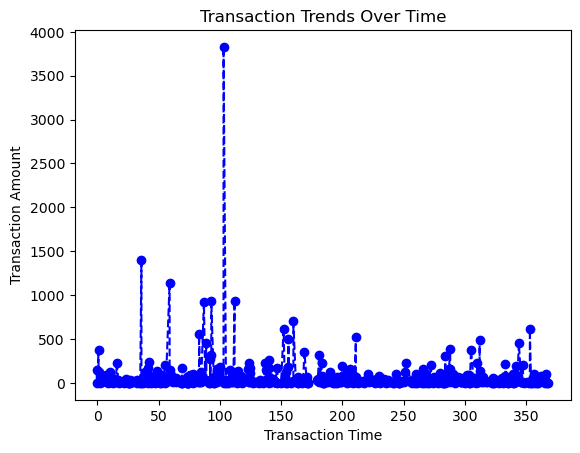

In [105]:
plt.plot(data["Time"][:500], data["Amount"][:500], marker="o", linestyle="--", color="blue")
plt.xlabel("Transaction Time")
plt.ylabel("Transaction Amount")
plt.title("Transaction Trends Over Time")
plt.show()

#### Pie Chart (Fraud vs. Legitimate Transactions

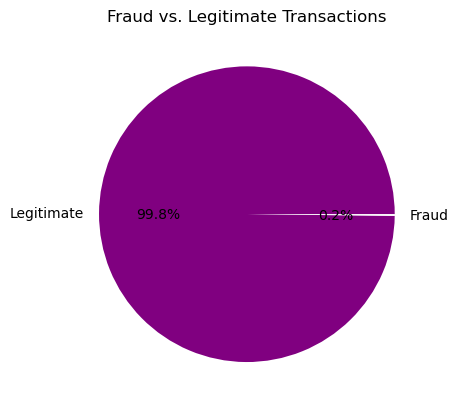

In [126]:
#Count fraud and legitimate transactions
fraud_counts = data["Class"].value_counts()
labels = ["Legitimate", "Fraud"]

# Create Pie Chart
plt.pie(fraud_counts, labels=labels, autopct="%1.1f%%", colors=["purple", "white"])
plt.title("Fraud vs. Legitimate Transactions")
plt.show()

#### Bubble Chart (Transaction Amount vs. Fraud Cases)

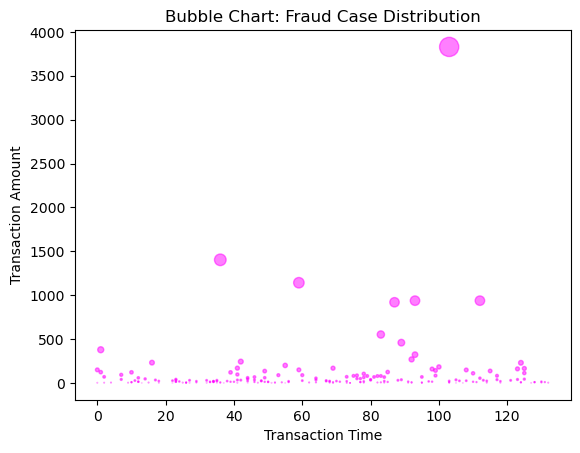

In [124]:
sizes = data["Amount"][:200] / 20  # Scale bubbles based on amount
plt.scatter(data["Time"][:200], data["Amount"][:200], s=sizes, c=data["Class"][:200], cmap="spring", alpha=0.5)
plt.xlabel("Transaction Time")
plt.ylabel("Transaction Amount")
plt.title("Bubble Chart: Fraud Case Distribution")
plt.show()

#### Step 7: Seaborn Visualizations

#### (Line Plot Fraud Transactions Over Time)

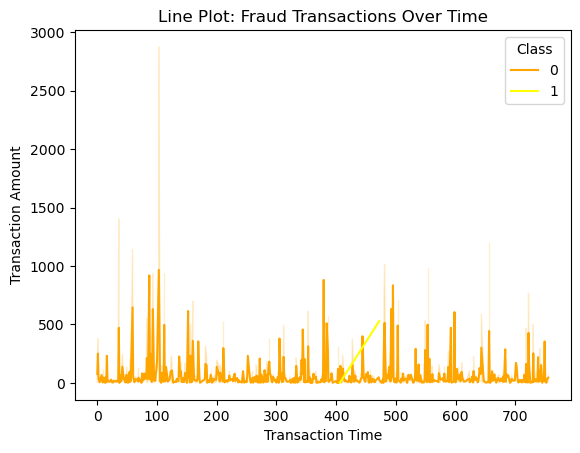

In [40]:
sns.lineplot(x=data["Time"][:1000], y=data["Amount"][:1000], hue=data["Class"], palette=["orange", "yellow"])
plt.xlabel("Transaction Time")
plt.ylabel("Transaction Amount")
plt.title("Line Plot: Fraud Transactions Over Time")
plt.show()

#### Bar Chart (Top Fraud Transactions)

C:\Users\NSTIW\AppData\Local\Temp\ipykernel_960\2368803392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_data["Amount"], y=fraud_data.index, palette="Reds")


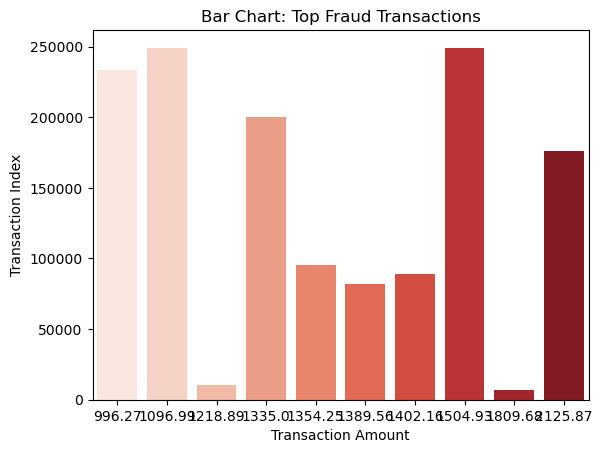

In [34]:
fraud_data = data[data["Class"] == 1].nlargest(10, "Amount")

sns.barplot(x=fraud_data["Amount"], y=fraud_data.index, palette="Reds")
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Index")
plt.title("Bar Chart: Top Fraud Transactions")
plt.show()

#### Strip Plot with Hue( Fraud vs. Legitimate Transactions)

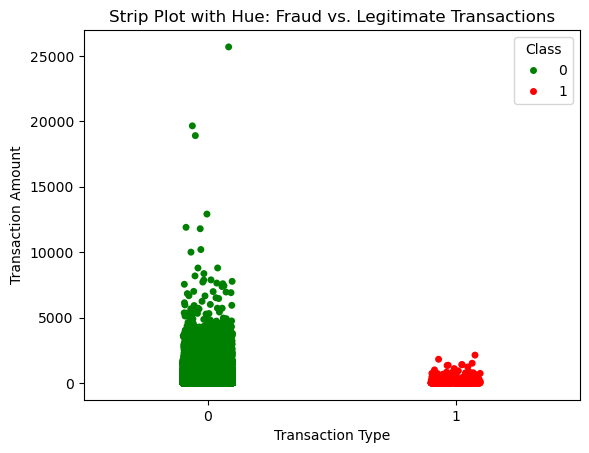

In [35]:
sns.stripplot(x=data["Class"], y=data["Amount"], hue=data["Class"], palette=["green", "red"])
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.title("Strip Plot with Hue: Fraud vs. Legitimate Transactions")
plt.show()

#### Step 8: Visualize the Decision Tree Structure

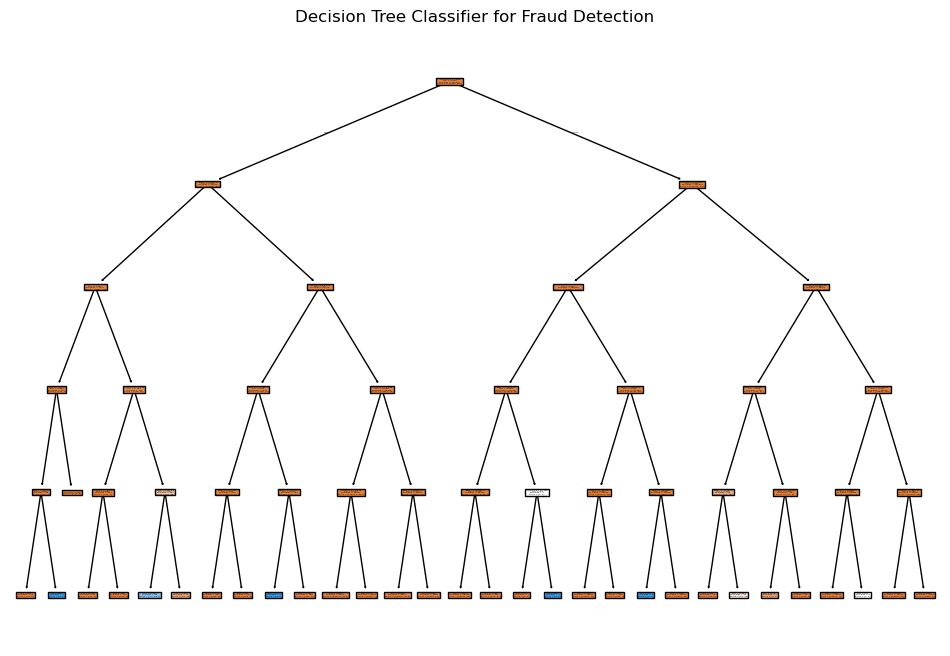

In [72]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=["Time", "Amount"], filled=True)
plt.title("Decision Tree Classifier for Fraud Detection")
plt.show()